In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import catboost as cb
import math


In [144]:
folder = "drive/MyDrive/AML_Pr_1/"
just_scoring = True
if just_scoring:
  preprocessed = folder + "preprocessed_data/"
else:
  preprocessed = folder + "ready_data//"

In [145]:
#X = pd.read_csv(preprocessed + 'X_preprocessed.csv',index_col=['id'])
#y = pd.read_csv(preprocessed + 'y_preprocessed.csv',index_col=['id'])

In [161]:
x_train = pd.read_csv(preprocessed + 'X_train_preprocessed.csv',index_col=['id'])
x_test = pd.read_csv(preprocessed + 'X_test_preprocessed.csv',index_col=['id'])
y_train = pd.read_csv(preprocessed + 'y_train_preprocessed.csv',index_col=['id'])
y_test = pd.read_csv(preprocessed + 'y_test_preprocessed.csv',index_col=['id'])

In [147]:
x_train_DL = pd.read_csv(preprocessed + 'X_train_preprocessed_DL.csv',index_col=['id'])
x_test_DL = pd.read_csv(preprocessed + 'X_test_preprocessed_DL.csv',index_col=['id'])
y_train_DL = pd.read_csv(preprocessed + 'y_train_preprocessed_DL.csv',index_col=['id'])
y_test_DL = pd.read_csv(preprocessed + 'y_test_preprocessed_DL.csv',index_col=['id'])

In [162]:
x_train

,x115,x458,x159,x485,x334,x465,x702,x415,x641,x194,...,isnan_x498,isnan_x322,x203,x431,x350,isnan_x718,isnan_x213,x796,x196,x161
id,,,,,,,,,,,,,,,,,,,,,
1057.0,-0.072561,1.319395,2.051507,-0.166584,-0.773960,-0.657563,2.732949,2.044104,0.523965,0.271085,...,-0.261162,-0.279982,-2.222826,0.110092,0.224198,-0.279982,-0.267542,0.900741,1.109632,0.832164
964.0,-0.544235,-0.894779,-0.734384,0.862037,0.694922,0.700992,-0.889715,-0.713228,-0.637694,0.563675,...,3.829039,-0.279982,0.840768,0.953159,2.201075,-0.279982,-0.267542,-0.974238,-0.717525,-0.464356
733.0,-2.130434,-1.773935,-0.105323,3.548587,3.353776,3.220385,-2.098605,-2.240828,-1.490229,3.520196,...,-0.261162,-0.279982,2.848115,2.847346,2.921306,-0.279982,-0.267542,-0.480563,0.924847,0.080729
1096.0,-0.617128,-1.207725,-1.056861,-0.419776,0.051271,0.182182,-1.075591,-0.848224,-0.561025,0.779910,...,-0.261162,-0.279982,0.329695,0.539621,-0.691155,-0.279982,-0.267542,-0.622656,0.267584,-1.537574
935.0,2.747323,3.158974,3.290282,0.271400,-1.923868,-1.929913,3.332456,3.243336,2.133132,-3.589531,...,-0.261162,-0.279982,-1.788902,-0.371000,-0.094343,-0.279982,3.737725,1.315790,-0.455786,0.128042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752.0,-0.040527,-0.055207,1.259396,-1.024980,-0.489789,-0.304519,0.860133,0.185504,1.568821,-0.757858,...,-0.261162,-0.279982,-1.039887,0.122096,0.824403,3.571660,-0.267542,0.317320,0.892765,-0.200745
1009.0,-0.194246,-0.575951,0.214776,-0.761695,-0.440215,-0.312103,0.023082,-0.418433,-0.398967,-0.556972,...,-0.261162,-0.279982,-0.666841,0.122096,0.556850,-0.279982,-0.267542,-0.710907,1.530019,-0.197009
802.0,-0.486940,-0.953812,-1.059863,0.753924,0.960945,0.867189,-0.914761,-0.701187,-0.358337,-0.363785,...,-0.261162,-0.279982,1.779414,-0.338148,-0.519648,-0.279982,-0.267542,1.577675,0.659592,-1.680730


In [149]:
TRAIN_RATIO = 0.8

def performance(y_pred):
  varb = y_test.empty
  if not y_test.empty:
    return r2_score(y_test,y_pred,)

def train_len(data = x_train):
  return math.floor(TRAIN_RATIO*len(data))

def validation_len(data = x_train):
    return len(data) - train_len(data)

def train(data = x_train):
    if isinstance(data, np.ndarray):
        return data[:train_len(data)].copy()
    return data.iloc[:train_len(data)].copy()

def validation(data = x_train):
    if isinstance(data, np.ndarray):
        return data[-validation_len(data):].copy()
    return data.iloc[-validation_len(data):].copy()

In [150]:
!pip install tensorflow-cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
X_NN = x_train_DL
x_test_NN = x_test_DL
y_train_NN = y_train_DL
y_test_NN = y_test_DL

In [127]:
from keras import regularizers
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_NN)

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.layers import LeakyReLU
from tensorflow import keras
from keras.layers import Dropout
from sklearn.metrics import r2_score
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential(normalizer)
model.add(Dense(512, input_dim=X_NN.shape[1], activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(256, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(32, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dense(1, activation='selu'))

# Compile the network :
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='mean_absolute_error', optimizer="adam", metrics=[tf.keras.metrics.MeanAbsoluteError()])
print(model.summary())
history = model.fit(np.array(X_NN), np.ravel(y_train_NN), epochs=15, batch_size=32, validation_split = 0.2,)
'''
0.3109574108528159
model = Sequential(normalizer)
model.add(Dense(512, input_dim=X_NN.shape[1], activation=LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(256, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.3,seed=1),)
model.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dropout(0.2,seed=1),)
model.add(Dense(32, activation='selu',kernel_regularizer = regularizers.l2(1)))
model.add(Dense(1, activation='selu'))
'''

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1656)             3313      
 ion)                                                            
                                                                 
 dense_27 (Dense)            (None, 512)               848384    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                      

"\n0.3109574108528159\nmodel = Sequential(normalizer)\nmodel.add(Dense(512, input_dim=X_NN.shape[1], activation=LeakyReLU(alpha=0.01)))\nmodel.add(Dropout(0.3,seed=1),)\nmodel.add(Dense(256, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.3,seed=1),)\nmodel.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.3,seed=1),)\nmodel.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.3,seed=1),)\nmodel.add(Dense(128, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.2,seed=1),)\nmodel.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.2,seed=1),)\nmodel.add(Dense(64, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dropout(0.2,seed=1),)\nmodel.add(Dense(32, activation='selu',kernel_regularizer = regularizers.l2(1)))\nmodel.add(Dense(1, activation='selu'))\n"

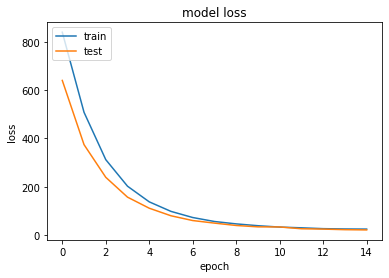

In [128]:
import matplotlib.pyplot as plt


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [129]:
y_pred_nn = model.predict(x_test_NN)
y_pred_nn = np.ravel(y_pred_nn)
if not y_test_NN.empty:
    print( r2_score(y_test_NN,y_pred_nn))

8/8 [==============================] - 0s 14ms/step
0.018825858546341223


In [130]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import lightgbm as lgb

# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [132]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    #'metric': {'l1', 'l2'},
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

def custom_r2(preds, train_data):
    labels = train_data.get_label()
    return 'r2', r2_score(labels, preds), True
# train
# gbm = lgb.train(params,
#                 lgb_train,
#                 num_boost_round=1000,
#                 feval=custom_r2,
#                 valid_sets={lgb_train, lgb_test},
#                 #early_stopping_rounds=50
#                )

In [133]:
# y_pred_lgbm = gbm.predict(x_test, num_iteration=gbm.best_iteration)
# print(performance(y_pred_lgbm))
#0.42787093167380685 k=120
#0.4417529000835657 k = 150
#0.4059320481021389 k = 100
#0.41670827750282924 k = 130
#0.4155919070669466 k = 110


In [134]:
%%time
import xgboost as xgb
xgbr = xgb.XGBRegressor(n_estimators=500, objective='reg:squarederror', booster='gbtree', tree_method="exact", gamma=0.05, n_jobs=-1)
xgbr.fit(np.array(x_train), np.ravel(y_train))
y_pred_xgbr = xgbr.predict(np.array(x_test))
print(performance(y_pred_xgbr))
#0.34132415111734893
#0.29472123378862936 max_depth=10, n_estimators=5000
#0.30... max_depth=6, n_estimators=5000
#0.34 max_depth=6 default, n_estimators=5000

0.3448240070532803
CPU times: user 55.7 s, sys: 79 ms, total: 55.7 s
Wall time: 46.6 s


In [135]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

mod = GradientBoostingRegressor(
    n_estimators=80, random_state = 0
)
mod.fit(np.array(x_train), np.ravel(y_train))
y_pred_gbr = mod.predict(np.array(x_test))
print(performance(y_pred_gbr))
#0.4109502743903839 k=120
#0.40526442752102065 k = 150
#0.3841232123612399 k = 100
#0.41130731785721 k = 130
#0.41014396209251347 k = 110
#0.4112152524076049 cheating knn

0.387967113004402


In [157]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(np.array(pd.concat([x_train, x_test], join = "inner")))
x_train[[col for col in x_train.columns]] = s.transform(np.array(x_train))
x_test[[col for col in x_train.columns]] = s.transform(np.array(x_test))

In [164]:
from sklearn.gaussian_process.kernels import RationalQuadratic, ExpSineSquared, RBF, DotProduct, Matern, ConstantKernel, WhiteKernel, PairwiseKernel, CompoundKernel
from sklearn.gaussian_process import GaussianProcessRegressor
kernel = RationalQuadratic()
#kernel = ConstantKernel()*Matern(nu=3)
gpc = GaussianProcessRegressor(normalize_y=True, kernel=kernel,random_state=0)
gpc.fit(np.array(x_train), np.ravel(y_train))
y_pred_gpr = gpc.predict(np.array(x_test))
y_pred_gpr = np.ravel(y_pred_gpr)
print(performance(y_pred_gpr))
#0.4814665809780243 k = 120
#0.4534585121517528 k = 150
#0.4733945218161426 k = 100
#0.4561416836658333 k = 130
#0.4728459798080792 k = 110
#0.48205601549946797 k=100 full_scaling
#0.4843879394490166 cheating knn
#0.4624442426210956 percentile

#0.4597329877309554 k=100 autoforest

0.4007847753368816


In [165]:
rfr = ExtraTreesRegressor(n_jobs=-1,n_estimators=341, random_state=0, min_samples_split=3)

rfr.fit(x_train, np.ravel(y_train))

y_pred_extra_trees = rfr.predict(x_test)

y_fake_extra_trees = rfr.predict(x_train)

print(performance(y_pred_extra_trees))
#0.5356171300373443
#0.35532062406231
#0.3761936314067723
# 0.3897876247411667 k feature = 80
# 0.37449264029700235 k feature = 100
# 0.411107572271865 added_booleans k=100
#0.4251722556943349
#0.4243527813999528 k=120
#0.4325048275124873 k=100 n_estimators = 341
#0.42743202491834176 k=120
#k = 80 0.42126352746679385
#0.4361964178712624 k=matteo
#0.4225671552724207 cheating knn
#0.4244630015060634 percentile

#0.4321033678302161 k=100 autoforest

0.40780105824185153


In [139]:
%%time
kernels = [ConstantKernel()*Matern(nu = nu_hat) for nu_hat in [0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 30]] + [RBF(length_scale = length_scale_hat) for length_scale_hat in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
gs_gpr = GridSearchCV(estimator=GaussianProcessRegressor(normalize_y=True, random_state=0),
                        param_grid={
                            #'normalize_y': [True, False]
                            #'kernel_nu' = [1, 30],
                            'kernel': kernels
                        },scoring='r2', n_jobs=-1)
gs_gpr.fit(np.array(x_train), np.ravel(y_train))


KeyboardInterrupt: ignored

In [140]:
y_pred_gs_gpr = gs_gpr.predict(np.array(x_test))
print("best parameters are: ", gs_gpr.best_params_)
print(performance(y_pred_gs_gpr))

NotFittedError: ignored

In [ ]:
from pandas.core.dtypes.cast import ensure_int64
from sklearn.linear_model import LinearRegression

if just_scoring:
  y_ensemblement = np.array([y_pred_extra_trees, y_pred_gpr]).T
  ens_lr = LinearRegression(fit_intercept=True)
  ens_lr.fit(X = y_ensemblement, y = y_test)
  print(performance(ens_lr.predict(y_ensemblement)))
  # 0.5167025280991099
else:
  best_y = ens_lr.predict(y_ensemblement)
  output_df = pd.DataFrame(best_y, columns = ['y'])
  output_df.to_csv(preprocessed + 'output.csv', index_label="id")
  output_df.to_csv(preprocessed + 'output.txt', index_label="id")

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
level0 = list()
level0.append(('GP', gpc))
level0.append(('extra_tree', rfr))
level1 = LinearRegression()
stacking_reg_4 = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
stacking_reg_4.fit(np.array(x_train), np.ravel(y_train))

y_stacking_3 = stacking_reg_4.predict(np.array(x_test))
print(performance(y_stacking_3))

if not just_scoring:
  output_df4 = pd.DataFrame(y_stacking_3, columns = ['y'])
  output_df4.to_csv(preprocessed + 'output4.csv', index_label="id")
  output_df4.to_csv(preprocessed + 'output4.txt', index_label="id")
  print(output_df4)

In [ ]:
%%time
rfr = ExtraTreesRegressor(n_jobs=-1, max_depth=None, random_state=0,
                          max_features=None,)

param_grid = {
    'n_estimators' : [250,300,341,350,400,500],
    'min_samples_split' : [2, 3]
    #'max_depth': [None,10,50,100],
    #'max_leaf_nodes':[None,10,50,100,200]
}

gcv = GridSearchCV(rfr,param_grid,cv=10,n_jobs=-1).fit(x_train,y_train.values.ravel())

#rfr.fit(x_train, np.ravel(y_train))

y_pred_extra_trees = gcv.predict(x_test)

print(performance(y_pred_extra_trees))
#0.4212718743068148 k = 120
#0.4198053058315343 k=150
#0.4215281814902644 k = 100
#0.41426719108498855 k = 130
#0.4172282346342855 k = 110
#0.4227583968390294 k=100 scaled afterwards

In [ ]:
gcv.best_params_

In [ ]:
grid_svr = GridSearchCV(

estimator=svm.SVR(kernel='rbf'),
        param_grid={
            'C': [20, 23, 25, 28, 30, 31, 32, 33, 34, 35, 38, 39, 40, 45, 50, 80, 100], #[1/10, 1, 10, 25, 50, 100],
            'epsilon': [0.0001, 0.0003, 0.007, 0.0109, 0.019, 0.05, 0.06, 0.07, 0.08, 0.1, 0.15, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.35, 0.38, 0.4, 0.45, 0.47, 0.48, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.6, 0.7, 0.8] #0.0001, 0.0003, 0.007, 0.0109, 0.019,0.05, 0.06, 0.07, 0.08, 0.1, 0.15, 0.2,
        },
        cv=10, scoring='r2', n_jobs=-1)
grid_svr.fit(x_train, np.ravel(y_train))

In [ ]:
print("best parameters are: ", grid_svr.best_params_)
#{'C': 38, 'epsilon': 0.0001} k=100 scaled afterwards

In [ ]:
y_pred_svr = grid_svr.predict(x_test)

print(performance(y_pred_svr))
#0.4564526871697161 k = 120
#0.4345425145286925 k = 150
#0.43736879664733896 k = 100
#0.4398857686750022 k = 130
#0.445489528177074 k = 110
#0.4324636744138056 k=100 scaled afterwards
#0.45618809020239703 k=100 superscaled

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr_random_forest = RandomForestRegressor(n_estimators=800, max_depth=10, random_state=0, n_jobs=-1)
regr_random_forest.fit(x_train, np.ravel(y_train))
y_pred_random_for = regr_random_forest.predict(x_test)

print(performance(y_pred_random_for))
#0.38263232701377947 k = 120
#0.3755322826479851 k=150
#0.3751342085259539 k=100
#0.3713326852364862 k = 130
#0.37229452588351186 k = 110
#0.37872546571993804 k=100 scaled afterwards
#0.38263232701377947 k=100 superscaled

In [ ]:
from catboost.utils import get_gpu_device_count
print('I see %i GPU devices' % get_gpu_device_count())

In [ ]:
catboost_model = cb.CatBoostRegressor(random_seed=0)
grid_catbooost = {'iterations': [200, 250, 300, 350, 400],
        'learning_rate': [0.05, 0.1, 0.2,0.5],
        'depth': [1, 2, 3, 4, 5],
        'l2_leaf_reg': [0.05, 0.1, 0.2, 0.5, 1, 2]}
catboost_model.grid_search(grid_catbooost, x_train, np.ravel(y_train),cv=10)
#Cross validation has to be done on validation set

In [ ]:
y_pred_catboost = catboost_model.predict(x_test)

print(performance(y_pred_catboost))
#0.37096077880846823 k = 120
#0.3688273815432537 k = 150
#0.3796823732529593 k = 100
#0.37141693779953233 k=130
#0.25922068424008127 k=110


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
level0 = list()
level0.append(('GP', gpc))
level0.append(('extra_tree', rfr))
level0.append(('svm', grid_svr.best_estimator_))
level1 = LinearRegression()
stacking_reg = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
stacking_reg.fit(x_train, np.ravel(y_train))

In [ ]:
y_stacking_3 = stacking_reg.predict(x_test)
print(performance(y_stacking_3))

In [ ]:
level0 = list()
level0.append(('GP', gpc))
level0.append(('extra_tree', rfr))
level0.append(('svm', grid_svr.best_estimator_))
level0.append(('gbr', mod))
level1 = LinearRegression()
stacking_reg_4 = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
stacking_reg_4.fit(x_train, np.ravel(y_train))

In [ ]:
y_stacking_4 = stacking_reg_4.predict(x_test)
print(performance(y_stacking_4))

In [ ]:
level0 = list()
level0.append(('GP', gpc))
level0.append(('extra_tree', rfr))
level1 = LinearRegression()
stacking_reg_2 = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
stacking_reg_2.fit(x_train, np.ravel(y_train))
y_stacking_2 = stacking_reg_2.predict(x_test)
print(performance(y_stacking_2))

In [ ]:
ensemble_pred  = (y_pred_extra_trees + y_pred_svr + y_pred_random_for  + y_pred_catboost + y_pred_gpr + y_pred_gbr + y_pred_lgbm)/7

print(performance(ensemble_pred))
#0.469588078973592 k = 120
#0.45699541297119506 k = 150
#0.4524360682481955 k = 100
#0.4515478678677596 k = 130
#0.4624519485290417 k = 110

In [ ]:
if just_scoring:
  extra_trees_perf = performance(y_pred_extra_trees)
  random_for_perf = performance(y_pred_random_for)
  catboost_perf = performance(y_pred_catboost)
  svr_perf = performance(y_pred_svr)
  gpr_perf = performance(y_pred_gpr)
  gbr_perf = performance(y_pred_gbr)
  #lgbm_perf = performance(y_pred_lgbm)
else:
    extra_trees_perf = 0.43091528588846495
    svr_perf = 0.44702595579327853
    random_for_perf = 0.3815054780797936
    catboost_perf = 0.41703333711700563
    gpr_perf = 0.4620910737351671
    gbr_perf = 0.4366241930586553
    lgbm_perf = 0.4231224116598067

tot_perf = extra_trees_perf + svr_perf + random_for_perf + catboost_perf + gpr_perf + gbr_perf + lgbm_perf

In [ ]:
enseble_pred_top_3_tot = gpr_perf + svr_perf  + extra_trees_perf
ensemble_pred_weighted_top_3 = (y_pred_extra_trees * extra_trees_perf + y_pred_svr*svr_perf + y_pred_gpr*gpr_perf )/enseble_pred_top_3_tot
print(performance(ensemble_pred_weighted_top_3))

In [ ]:
enseble_pred_top_4_tot = gpr_perf + svr_perf + gbr_perf + extra_trees_perf
ensemble_pred_weighted_top_4 = (y_pred_extra_trees * extra_trees_perf + y_pred_svr*svr_perf + y_pred_gpr*gpr_perf + y_pred_gbr*gbr_perf )/enseble_pred_top_4_tot
print(performance(ensemble_pred_weighted_top_4))
# 0.4875291642220114 k = 120 svm + extra_trees + gbr + gpr
#0.4709725188805146 k = 150
#0.47156082937596067 k = 100
#0.4707594773357324 k = 130
#0.4807381818956489 k = 110

In [ ]:
ensemble_pred_weighted  = (y_pred_extra_trees * extra_trees_perf + y_pred_svr*svr_perf + y_pred_random_for * random_for_perf  + y_pred_catboost* catboost_perf + y_pred_gpr*gpr_perf + y_pred_gbr*gbr_perf + lgbm_perf*y_pred_lgbm)/tot_perf
print(performance(ensemble_pred_weighted))
#0.4727319402554333 k = 120
#0.4596058662445207 k = 150
#0.4557585874346525 k = 100
#0.4543190848570693 k = 130
#0.46677751533723666 k=110

In [ ]:
pd.concat([pd.DataFrame(y_pred_extra_trees),pd.DataFrame(y_pred_svr),pd.DataFrame(y_pred_random_for),pd.DataFrame(y_pred_catboost),pd.DataFrame(y_pred_gpr),pd.DataFrame(y_pred_gbr),pd.DataFrame(y_pred_lgbm),pd.DataFrame(ensemble_pred_weighted)],axis = 1)

In [ ]:
output_df = pd.DataFrame(ensemble_pred_weighted_top_3, columns = ['y'])
output_df

In [ ]:
output_df.to_csv(preprocessed + 'output.csv', index_label="id")
output_df.to_csv(preprocessed + 'output.txt', index_label="id")

In [ ]:
output_df2 = pd.DataFrame(y_stacking_3, columns = ['y'])
output_df2

In [ ]:
output_df2.to_csv(preprocessed + 'output2.csv', index_label="id")
output_df2.to_csv(preprocessed + 'output2.txt', index_label="id")

In [ ]:
output_df3 = pd.DataFrame(ensemble_pred_weighted_top_4, columns = ['y'])
output_df3

In [ ]:
output_df3.to_csv(preprocessed + 'output3.csv', index_label="id")
output_df3.to_csv(preprocessed + 'output3.txt', index_label="id")

In [ ]:
output_df4 = pd.DataFrame(y_stacking_4, columns = ['y'])
output_df4.to_csv(preprocessed + 'output4.csv', index_label="id")
output_df4.to_csv(preprocessed + 'output4.txt', index_label="id")

In [ ]:
output_df5 = pd.DataFrame(y_stacking_2, columns = ['y'])
output_df5.to_csv(preprocessed + 'output5.csv', index_label="id")
output_df5.to_csv(preprocessed + 'output5.txt', index_label="id")

In [ ]:
output_df = pd.DataFrame(y_pred_gpr, columns = ['y'])
output_df

In [ ]:
output_df.to_csv(preprocessed + 'output.csv', index_label="id")
output_df.to_csv(preprocessed + 'output.txt', index_label="id")